In [ ]:
#libraries

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association



file = r"..\data\clean\clean_Aurelie\clean_df_all_with_dates_and_time.csv"
df_all = pd.read_csv(file)

#### Pourcentage de drop à chaque étape du funnel


Taux d’abandon (%) entre les étapes du funnel.

Taux de conversion globale (%) du funnel.

In [51]:
# Create the crosstab for all process steps and variations
crosstab_all = pd.crosstab(df_all["process_step"], df_all["Variation"])

# Define the steps in order
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']  

# Control group counts for each step
control_counts = [47589, 29657, 25877, 22787, 17498]

# Test group counts for each step
test_counts = [56452, 38753, 30978, 25888, 25716]


In [52]:
# Percentage per step -> Completion Rate

# Initial count for the control group
control_start = control_counts[0]

# Initial count for the test group
test_start = test_counts[0]

# Calculate the completion percentages for the control group
control_percentages = [count / control_start * 100 for count in control_counts]

# Calculate the completion percentages for the test group
test_percentages = [count / test_start * 100 for count in test_counts]

print("Control:", control_percentages)
print("Test:", test_percentages)


Control: [100.0, 62.31902330370463, 54.37601126310702, 47.88291411880897, 36.7690012397823]
Test: [100.0, 68.6477007014809, 54.874938000425146, 45.858428399348114, 45.553744774321544]


In [53]:
steps_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Reindex the crosstab to ensure it follows the correct order
crosstab_all = crosstab_all.reindex(steps_order)
print(crosstab_all)

# Extract control and test counts from the crosstab
control_counts = crosstab_all['Control']
test_counts = crosstab_all['Test']

# Get the starting counts for control and test groups
control_start = control_counts.loc['start']
test_start = test_counts.loc['start']

print(f"\nControl Start (start): {control_start}")
print(f"Test Start (start): {test_start}")

# Calculate the completion percentages for control and test groups
control_percentages = (control_counts / control_start) * 100
test_percentages = (test_counts / test_start) * 100

# Round the percentages to 2 decimal places and convert to lists
control_percentages = control_percentages.round(2).tolist()
test_percentages = test_percentages.round(2).tolist()

print("\nControl (%):", control_percentages)
print("Test (%):", test_percentages)


Variation     Control   Test
process_step                
start           47589  56452
step_1          29657  38753
step_2          25877  30978
step_3          22787  25888
confirm         17498  25716

Control Start (start): 47589
Test Start (start): 56452

Control (%): [100.0, 62.32, 54.38, 47.88, 36.77]
Test (%): [100.0, 68.65, 54.87, 45.86, 45.55]


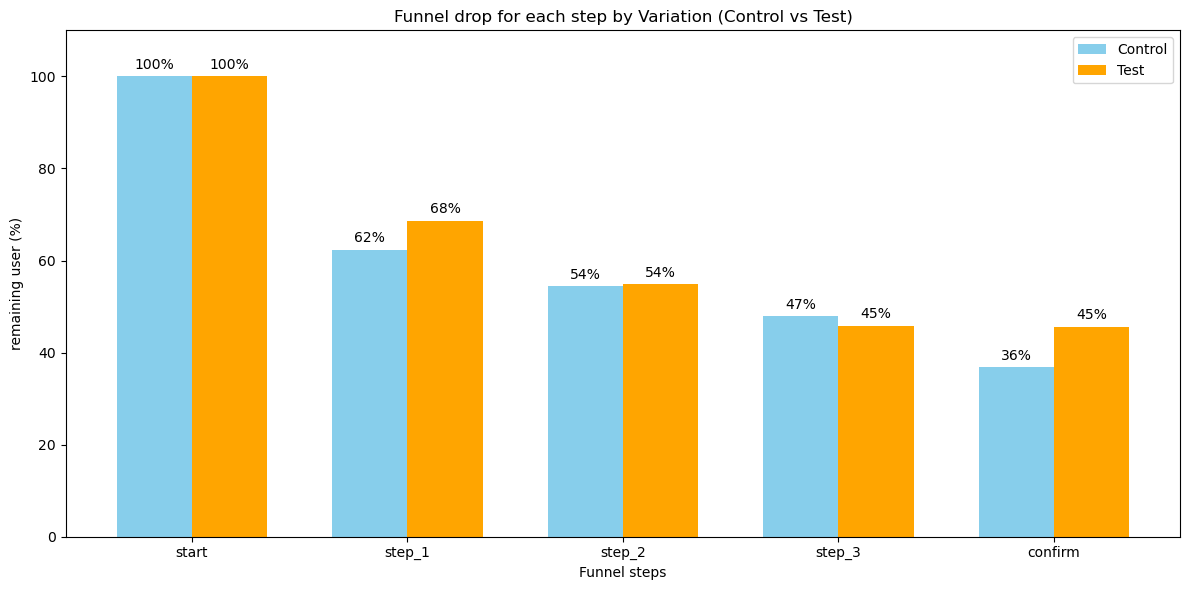

In [15]:
#dataviz
x = np.arange(len(steps))  
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))


# size and personalization 
ax.bar(x - bar_width / 2, control_percentages, bar_width, label='Control', color='skyblue')
ax.bar(x + bar_width / 2, test_percentages, bar_width, label='Test', color='orange')

# add percentage to barplot
for i, (c_perc, t_perc) in enumerate(zip(control_percentages, test_percentages)):
    ax.text(i - bar_width / 2, c_perc + 1, f"{int(c_perc)}%", ha='center', va='bottom')
    ax.text(i + bar_width / 2, t_perc + 1, f"{int(t_perc)}%", ha='center', va='bottom')


ax.set_xticks(x)
ax.set_xticklabels(steps)
ax.set_xlabel('Funnel steps')
ax.set_ylabel('remaining user (%)')
ax.set_ylim(0, 110)  
ax.set_title('Funnel drop for each step by Variation (Control vs Test)')
ax.legend()

plt.tight_layout()
plt.show()

In [54]:
# Drop-out Rate

# Calculate the drop-out rates for the control group
control_dropout_rates = []
for i in range(1, len(control_counts)):
    rate = ((control_counts[i-1] - control_counts[i]) / control_counts[i-1]) * 100
    control_dropout_rates.append(rate)

# Calculate the drop-out rates for the test group
test_dropout_rates = []
for i in range(1, len(test_counts)):
    rate = ((test_counts[i-1] - test_counts[i]) / test_counts[i-1]) * 100
    test_dropout_rates.append(rate)

# Define the drop-out steps
steps_dropout = steps[1:]  

control_dropout_rates, test_dropout_rates


C:\Users\aurel\AppData\Local\Temp\ipykernel_26896\3916910612.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rate = ((control_counts[i-1] - control_counts[i]) / control_counts[i-1]) * 100
C:\Users\aurel\AppData\Local\Temp\ipykernel_26896\3916910612.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rate = ((test_counts[i-1] - test_counts[i]) / test_counts[i-1]) * 100


([37.68097669629536, 12.74572613548235, 11.941106001468485, 23.21060253653399],
 [31.3522992985191, 20.06296286739091, 16.43101555942927, 0.6644004944375772])

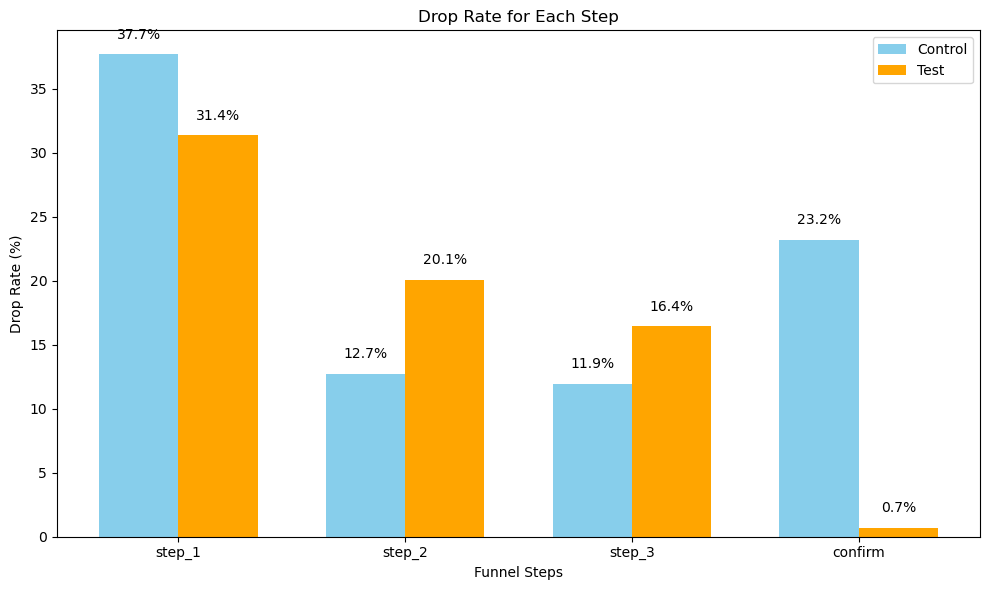

In [55]:
# Data Visualization
x = np.arange(len(steps_dropout)) 
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart for control and test groups
ax.bar(x - bar_width / 2, control_dropout_rates, bar_width, label='Control', color='skyblue')
ax.bar(x + bar_width / 2, test_dropout_rates, bar_width, label='Test', color='orange')

# Add the dropout rate text on top of each bar
for i, (c_rate, t_rate) in enumerate(zip(control_dropout_rates, test_dropout_rates)):
    ax.text(i - bar_width / 2, c_rate + 1, f"{c_rate:.1f}%", ha='center', va='bottom')
    ax.text(i + bar_width / 2, t_rate + 1, f"{t_rate:.1f}%", ha='center', va='bottom')

# Set the x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(steps_dropout)
ax.set_xlabel('Funnel Steps')
ax.set_ylabel('Drop Rate (%)')
ax.set_title('Drop Rate for Each Step')
ax.legend()

# Adjust layout to fit everything neatly
plt.tight_layout()
plt.show()


Conclusion : 

The visualization highlights the dropout rates at each step of the funnel for both the Control and Test groups. Key observations include:

Step 1 has the highest dropout rate for both groups, with 37.7% in Control and 31.4% in Test, indicating significant user loss at the initial stage.

The Test group consistently outperforms the Control group, showing lower dropout rates across all steps, particularly at Step 2 (12.7% vs. 20.1%) and Step 3 (11.9% vs. 16.4%).

The confirm step has almost negligible dropout for both groups, indicating that users who reach this stage are very likely to complete the process.

This suggests that the Test variation improves user retention, particularly in the later steps of the funnel. However, the high dropout at Step 1 should be a priority for optimization.

#### Demographic granularity: on completion rate 

completion and drop-out rates by age group 

In [41]:
# Define bins and labels based on quartiles
bins_quartiles = [17, 34.5, 50, 61, 96]
labels_quartiles = ['17-34', '35-50', '51-61', '62-96']

# Create the 'age_group' column using pd.cut
df_all['age_group'] = pd.cut(
    df_all['clnt_age'],
    bins=bins_quartiles,
    labels=labels_quartiles,
    right=True,
    include_lowest=True
)

# Verify the creation of 'age_group'
print("Columns of df:", df_all.columns.tolist())
print("\nDistribution of age groups:")
print(df_all['age_group'].value_counts())
print("\nNumber of NaN values in 'age_group':", df_all['age_group'].isnull().sum())

# Create the crosstab using 'age_group' and 'Variation'
crosstab_age = pd.crosstab([df_all["age_group"], df_all["Variation"]], df_all['process_step'])

print("\nCrosstab (crosstab_age):")
print(crosstab_age.head())

# Calculate percentages relative to 'start' for each age_group and Variation
crosstab_percentages = crosstab_age.div(crosstab_age['start'], axis=0) * 100
crosstab_percentages = crosstab_percentages.round(2)

print("\nSuccess Percentages in the Funnel:")
print(crosstab_percentages.head())

# Reset the index for easier manipulation
crosstab_percentages_reset = crosstab_percentages.reset_index()

print("\nColumns of crosstab_percentages_reset:", crosstab_percentages_reset.columns.tolist())
print("\nPreview of crosstab_percentages_reset:")
print(crosstab_percentages_reset.head())

# Define the funnel steps in order
steps_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
steps_dropout = steps_order[1:]

# Calculate dropout rates by age group and Variation
dropout_data = []

for index, row in crosstab_percentages_reset.iterrows():
    age_group = row['age_group']
    variation = row['Variation']
    for i in range(1, len(steps_order)):
        previous_step = steps_order[i-1]
        current_step = steps_order[i]
        if row[previous_step] == 0:
            rate = 0  # avoid division by zero
        else:
            rate = ((row[previous_step] - row[current_step]) / row[previous_step]) * 100
        # Handling negative rates
        if rate < 0:
            print(f"Warning: Negative dropout rate for {age_group} - {variation} at step {current_step}. Value: {rate}")
            rate = 0  # or another strategy according to your context
        dropout_data.append({
            'age_group': age_group,
            'Variation': variation,
            'step': current_step,
            'dropout_rate': round(rate, 2)
        })
        print("dropout rate", rate)

# Convert to DataFrame
dropout_df = pd.DataFrame(dropout_data)

print("\nDropout Rates DataFrame:")
print(dropout_df.head())



Columns of df: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'date', 'time', 'age_group']

Distribution of age groups:
age_group
51-61    81536
17-34    81035
35-50    80387
62-96    78237
Name: count, dtype: int64

Number of NaN values in 'age_group': 0

Crosstab (crosstab_age):
process_step         confirm  start  step_1  step_2  step_3
age_group Variation                                        
17-34     Control       4597  11596    7564    6991    6062
          Test          6840  13614    9706    7624    6441
35-50     Control       4570  11944    7556    6693    5726
          Test          6512  13980    9470    7603    6333
51-61     Control       4397  12029    7346    6527    5734

Success Percentages in the Funnel:
process_step         confirm  start  step_1  step_2  step_3
age_group Variation                                        
17-34   

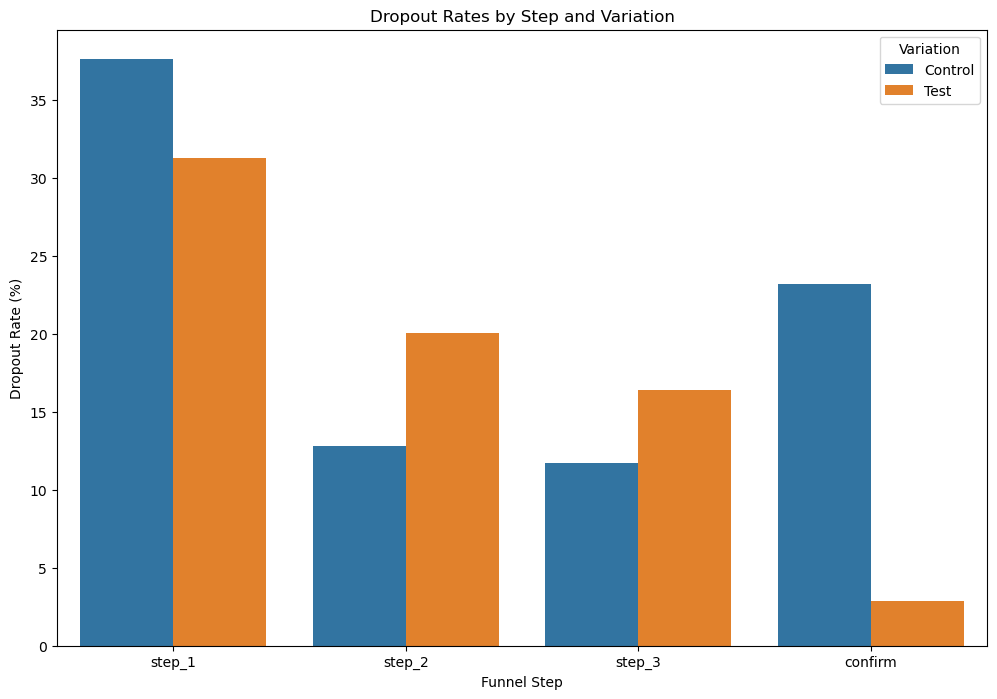

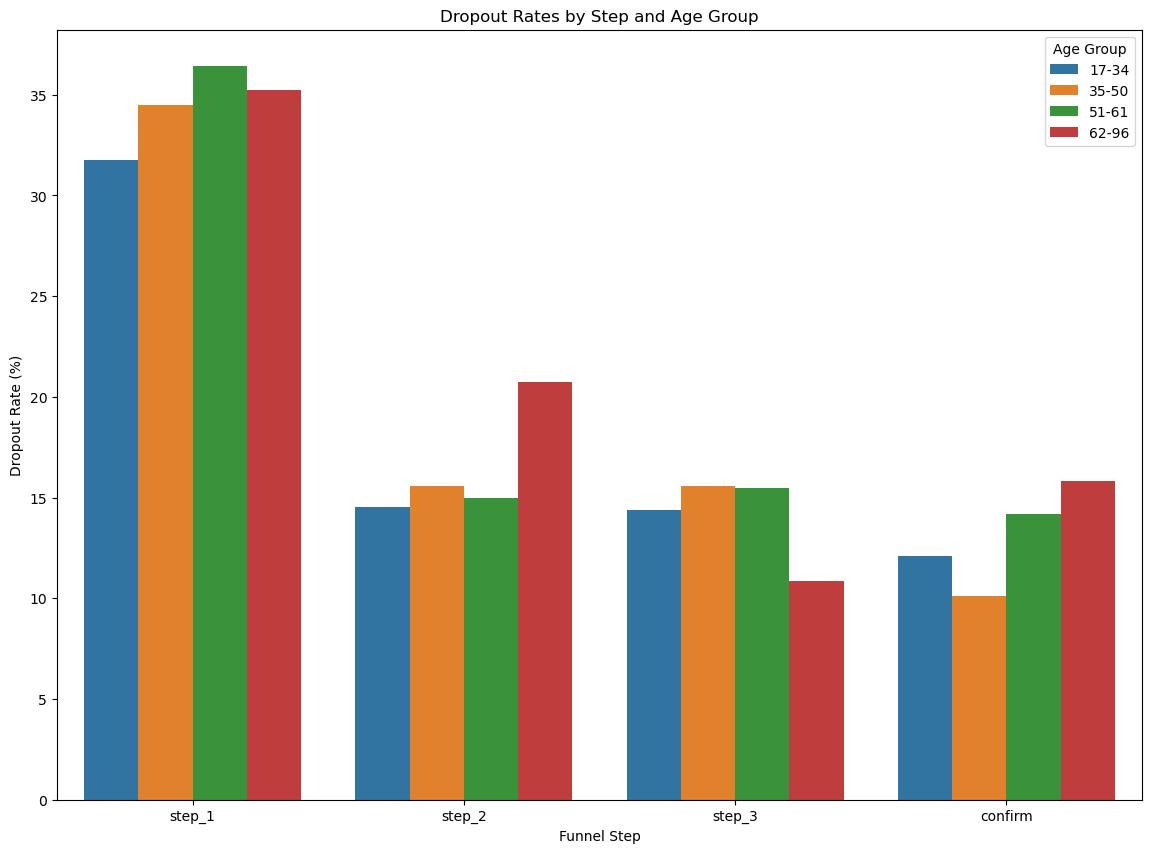

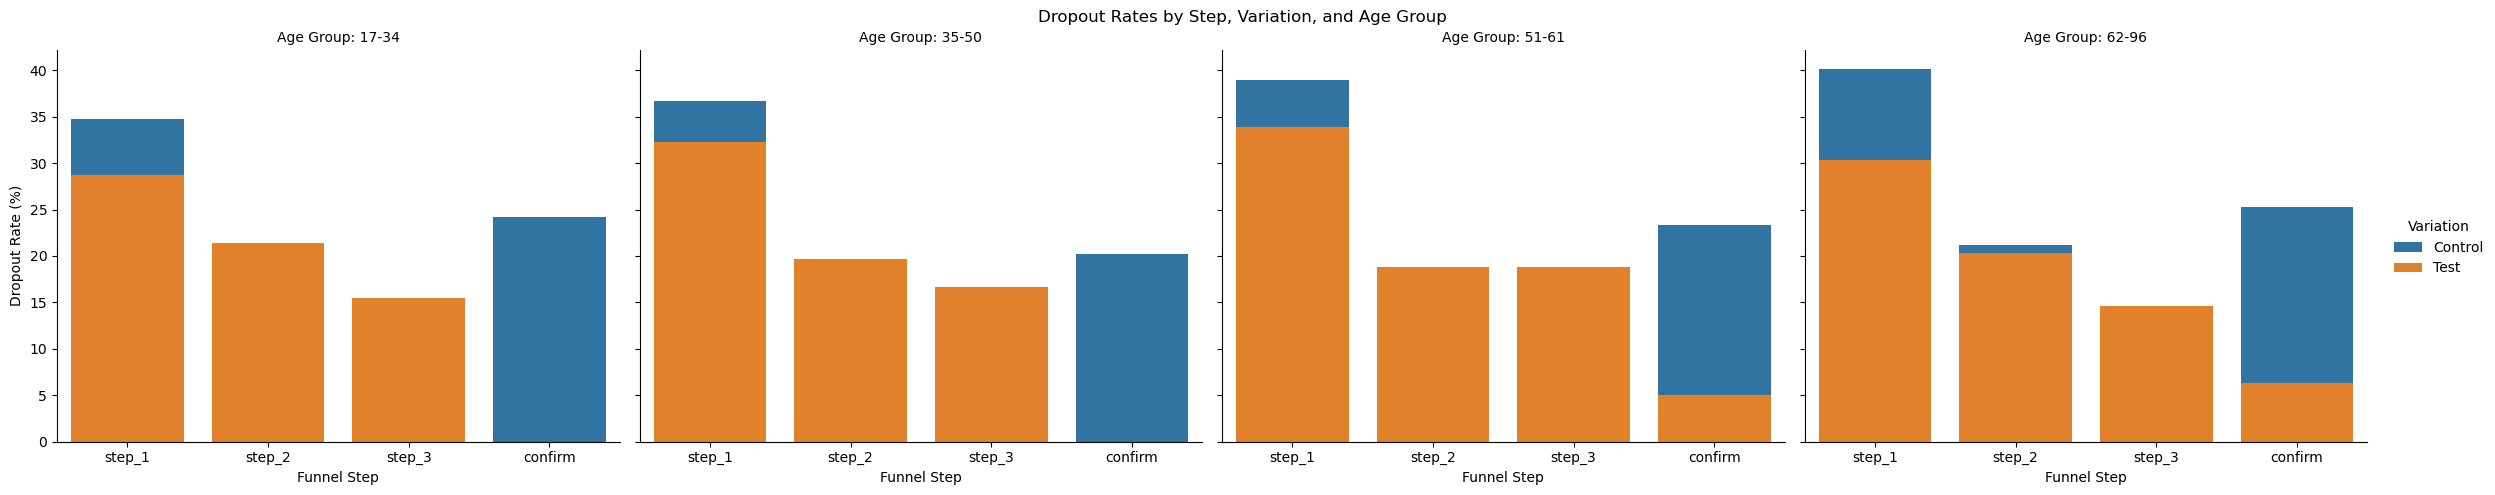

In [42]:
# Plot dropout rates by step and Variation
plt.figure(figsize=(12, 8))
sns.barplot(
    data=dropout_df,
    x='step',
    y='dropout_rate',
    hue='Variation',
    errorbar=None
)
plt.title('Dropout Rates by Step and Variation')
plt.xlabel('Funnel Step')
plt.ylabel('Dropout Rate (%)')
plt.legend(title='Variation')
plt.show()

# Plot dropout rates by step and Age Group
plt.figure(figsize=(14, 10))
sns.barplot(
    data=dropout_df,
    x='step',
    y='dropout_rate',
    hue='age_group',
    errorbar=None
)
plt.title('Dropout Rates by Step and Age Group')
plt.xlabel('Funnel Step')
plt.ylabel('Dropout Rate (%)')
plt.legend(title='Age Group')
plt.show()

# Use FacetGrid to visualize by Age Group and Variation
g = sns.FacetGrid(dropout_df, col='age_group', hue='Variation', height=5, aspect=1.2)
g.map(sns.barplot, 'step', 'dropout_rate', order=steps_order[1:], errorbar=None)
g.add_legend(title='Variation')
g.set_titles('Age Group: {col_name}')
g.set_axis_labels('Funnel Step', 'Dropout Rate (%)')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dropout Rates by Step, Variation, and Age Group')
plt.show()



Age distribution of users who dropped out:
age_group
17-34    15778
35-50    17851
51-61    19727
62-96    21824
Name: count, dtype: int64


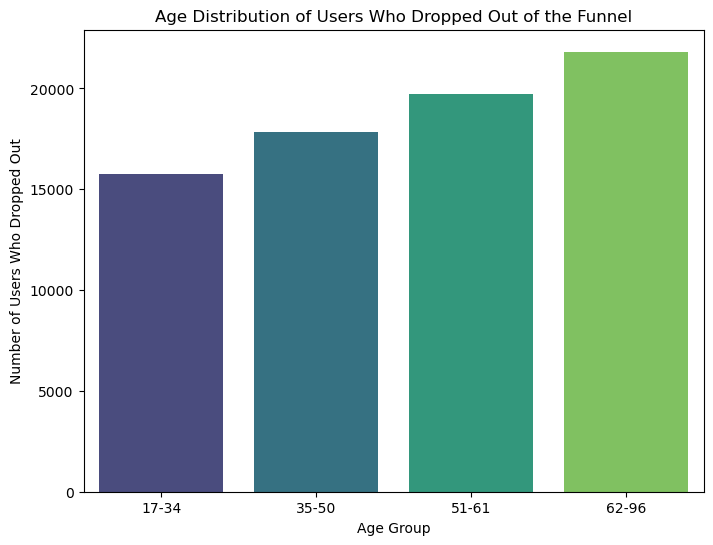

In [ ]:
# Identify users who did not reach 'confirm'
users_reached_confirm = df_all[df_all['process_step'] == 'confirm']['client_id'].unique()
df_dropout_users = df_all[~df_all['client_id'].isin(users_reached_confirm)]

# Analyze the ages of users who dropped out
dropout_age_distribution = df_dropout_users['age_group'].value_counts().sort_index()

print("\nAge distribution of users who dropped out:")
print(dropout_age_distribution)

# Visualize the age distribution of users who dropped out
plt.figure(figsize=(8,6))
sns.barplot(x=dropout_age_distribution.index, y=dropout_age_distribution.values, hue=dropout_age_distribution.index, palette='viridis')
plt.title('Age Distribution of Users Who Dropped Out of the Funnel')
plt.xlabel('Age Group')
plt.ylabel('Number of Users Who Dropped Out')
plt.show()


In [44]:
# Create the 'age_group' column using pd.qcut
df_all['age_group'] = pd.qcut(
    df_all['clnt_age'],
    q=4,
    labels=labels_quartiles
)

# Print the columns of the dataframe
print("Columns of df_all:", df_all.columns.tolist())
print("\nDistribution of age groups:")
print(df_all['age_group'].value_counts())
print("\nNumber of NaN values in 'age_group':", df_all['age_group'].isnull().sum())

# Create the crosstab using 'age_group' and 'Variation'
crosstab_age = pd.crosstab([df_all["age_group"], df_all["Variation"]], df_all['process_step'])

print("\nCrosstab (crosstab_age):")
print(crosstab_age.head())

# Calculate percentages relative to 'start' for each age_group and Variation
crosstab_percentages = crosstab_age.div(crosstab_age['start'], axis=0) * 100
crosstab_percentages = crosstab_percentages.round(2)

print("\nSuccess Percentages in the Funnel:")
print(crosstab_percentages.head())

# Reset the index for easier manipulation
crosstab_percentages_reset = crosstab_percentages.reset_index()

print("\nColumns of crosstab_percentages_reset:", crosstab_percentages_reset.columns.tolist())
print("\nPreview of crosstab_percentages_reset:")
print(crosstab_percentages_reset.head())


Columns of df_all: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'date', 'time', 'age_group']

Distribution of age groups:
age_group
51-61    81536
17-34    81035
35-50    80387
62-96    78237
Name: count, dtype: int64

Number of NaN values in 'age_group': 0

Crosstab (crosstab_age):
process_step         confirm  start  step_1  step_2  step_3
age_group Variation                                        
17-34     Control       4597  11596    7564    6991    6062
          Test          6840  13614    9706    7624    6441
35-50     Control       4570  11944    7556    6693    5726
          Test          6512  13980    9470    7603    6333
51-61     Control       4397  12029    7346    6527    5734

Success Percentages in the Funnel:
process_step         confirm  start  step_1  step_2  step_3
age_group Variation                                        
17-3

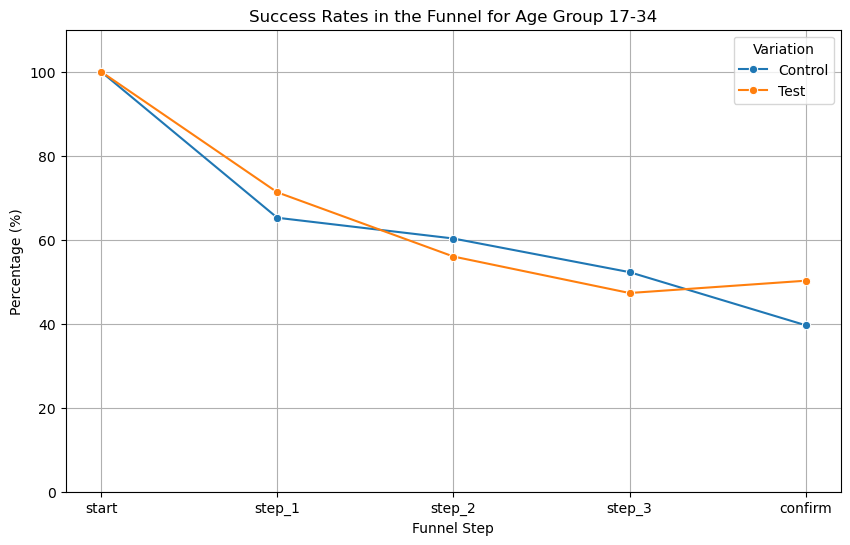

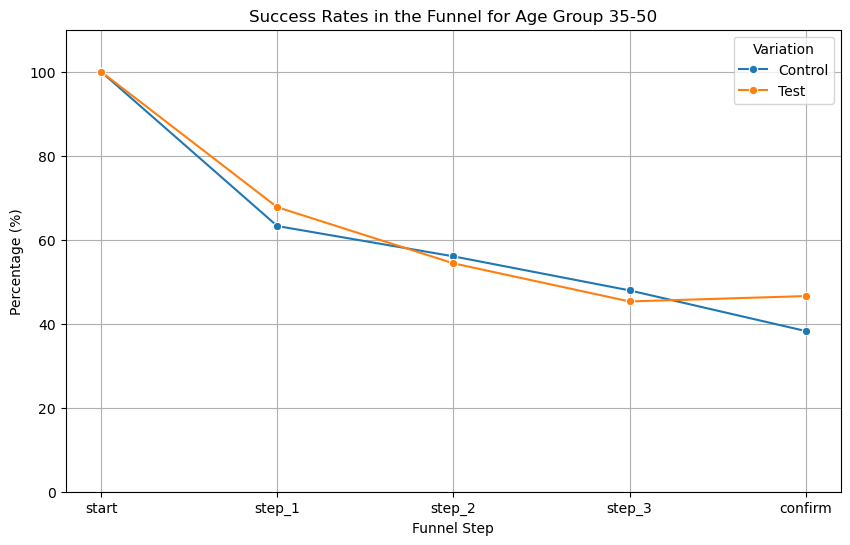

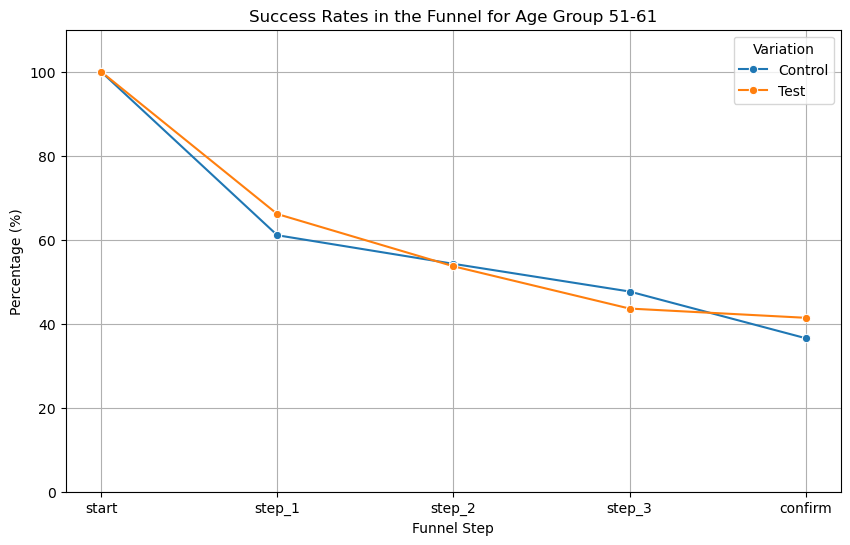

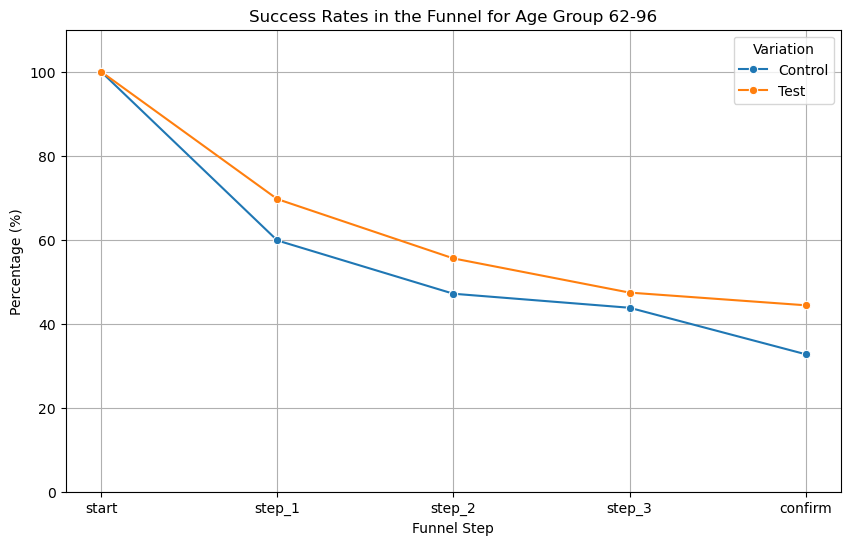

In [45]:
steps_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Iterate through each age group
for age_group in labels_quartiles:
    plt.figure(figsize=(10, 6))

    # Filter the dataframe for the current age group
    subset = crosstab_percentages_reset[crosstab_percentages_reset['age_group'] == age_group]
    if subset.empty:
        print(f"No data for the age group {age_group}.")
        continue
    
    # Melt the dataframe for easier plotting
    subset_melted = subset.melt(id_vars=['age_group', 'Variation'], value_vars=steps_order, var_name='process_step', value_name='percentage')
    
    # Create a line plot for the current age group
    sns.lineplot(
        data=subset_melted,
        x='process_step',
        y='percentage',
        hue='Variation',
        marker='o'
    )
    
    plt.title(f'Success Rates in the Funnel for Age Group {age_group}')
    plt.xlabel('Funnel Step')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 110)
    plt.grid(True)
    plt.legend(title='Variation')
    plt.show()


#### Number of sessions required to reach conversion (confirm)

Average number of sessions per user before conversion.

Session distribution (median, percentiles).

In [29]:
#completion rate
# Step 1: Filter data for users who reached "confirm"
df_confirm = df_all[df_all["process_step"] == "confirm"]

sessions_per_user = df_all.groupby("client_id")["visit_id"].nunique().reset_index()
sessions_per_user.columns = ["client_id", "session_count"]

df_variation = df_confirm[["client_id", "Variation"]].drop_duplicates()
sessions_per_user = sessions_per_user.merge(df_variation, on="client_id")

stats = sessions_per_user.groupby("Variation")["session_count"].describe()

print(stats)



             count      mean       std  min  25%  50%  75%   max
Variation                                                       
Control    15428.0  1.406469  0.879166  1.0  1.0  1.0  2.0  18.0
Test       18682.0  1.414303  0.859092  1.0  1.0  1.0  2.0  14.0


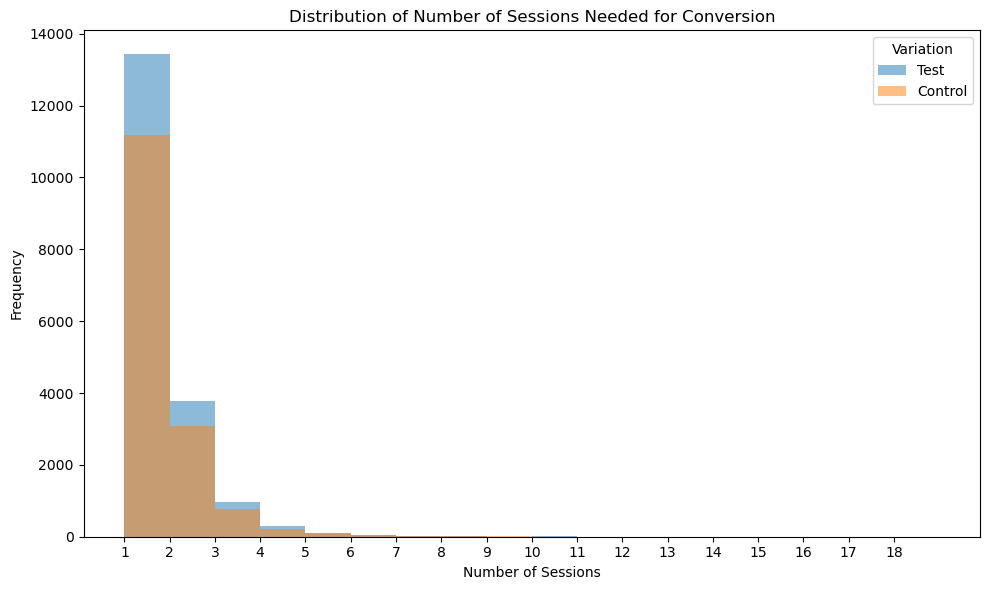

In [49]:
plt.figure(figsize=(10, 6))

for variation in sessions_per_user["Variation"].unique():
    subset = sessions_per_user[sessions_per_user["Variation"] == variation]
    plt.hist(subset["session_count"], bins=range(1, subset["session_count"].max() + 2), 
             alpha=0.5, label=variation)

plt.title("Distribution of Number of Sessions Needed for Conversion")
plt.xlabel("Number of Sessions")
plt.ylabel("Frequency")
plt.legend(title="Variation")
plt.xticks(range(1, sessions_per_user["session_count"].max() + 1))
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_8280\964781452.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2")


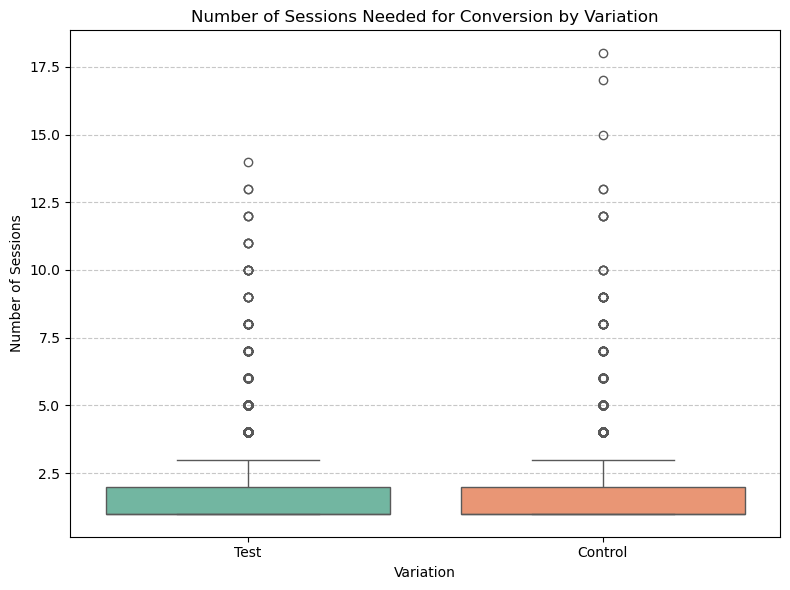

In [ ]:

sessions_per_user["Variation"] = sessions_per_user["Variation"].replace({"Control": "Control", "Test": "Test"}) 
plt.figure(figsize=(8, 6))

sns.boxplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2")

plt.title("Number of Sessions Needed for Conversion by Variation")
plt.xlabel("Variation")
plt.ylabel("Number of Sessions")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_8280\1586418212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2", inner="quartile")


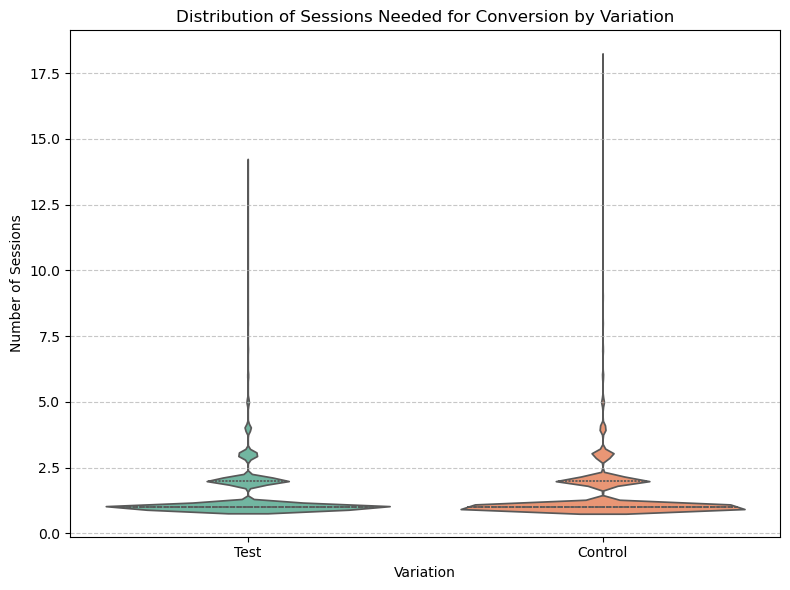

In [ ]:
plt.figure(figsize=(8, 6))

sns.violinplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2", inner="quartile")

plt.title("Distribution of Sessions Needed for Conversion by Variation")
plt.xlabel("Variation")
plt.ylabel("Number of Sessions")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Completion rate 

conclusion

15,428 users in the control group converted.
18,682 users in the test group converted.
This suggests that, in terms of total conversions, the Test group performed better than the Control group.

Average Number of Sessions Needed:

Users in the Control group needed 1.41 sessions on average to convert.
Likewise, 1.41 sessions were needed by users in the Test group.
There is no discernible improvement in the number of sessions required for conversion between the two groups, indicating a negligible difference.



#### Time spent per stage 

time spent by customers at each stage, 
helping to identify potential friction points.

In [30]:
from datetime import time, timedelta 
df_all['date_time'] = pd.to_datetime(df_all['date'] + ' ' + df_all['time'])
df_all = df_all.sort_values(by=['client_id', 'date_time'])

df_all['time_diff'] = df_all.groupby('client_id')['date_time'].diff()

df_all = df_all[df_all['time_diff'].notnull()]
time_spent = df_all.groupby(['process_step', 'Variation'])['time_diff'].mean().reset_index()


time_spent['time_diff_seconds'] = time_spent['time_diff'].dt.total_seconds()

print(time_spent)


C:\Users\aurel\AppData\Local\Temp\ipykernel_26896\2145597194.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_all['date_time'] = pd.to_datetime(df_all['date'] + ' ' + df_all['time'])


  process_step Variation                 time_diff  time_diff_seconds
0      confirm   Control 0 days 18:21:28.929438717       66088.929439
1      confirm      Test 1 days 05:00:41.146959592      104441.146960
2        start   Control 4 days 06:00:29.253662965      367229.253663
3        start      Test 3 days 02:55:37.780723214      269737.780723
4       step_1   Control 0 days 00:30:39.454895991        1839.454896
5       step_1      Test 0 days 00:22:20.321410097        1340.321410
6       step_2   Control 0 days 00:00:39.348409292          39.348409
7       step_2      Test 0 days 00:01:51.238731757         111.238732
8       step_3   Control 0 days 00:09:35.399797882         575.399798
9       step_3      Test 0 days 00:12:19.069989559         739.069990


In [32]:
# Parse dates correctly
df_all['date_time'] = pd.to_datetime(df_all['date'] + ' ' + df_all['time'], dayfirst=True)

df_all['time_diff_seconds'] = df_all['time_diff'].dt.total_seconds()
df_all = df_all[(df_all['time_diff_seconds'] > 0) & (df_all['time_diff_seconds'] < 86400)]  

time_spent = df_all.groupby(['process_step', 'Variation'])['time_diff_seconds'].median().reset_index()
time_spent['time_diff_minutes'] = time_spent['time_diff_seconds'] / 60

print(time_spent)

  process_step Variation  time_diff_seconds  time_diff_minutes
0      confirm   Control               75.0           1.250000
1      confirm      Test               59.0           0.983333
2        start   Control               65.0           1.083333
3        start      Test               63.0           1.050000
4       step_1   Control               18.0           0.300000
5       step_1      Test               11.0           0.183333
6       step_2   Control               20.0           0.333333
7       step_2      Test               25.0           0.416667
8       step_3   Control               67.0           1.116667
9       step_3      Test               67.0           1.116667


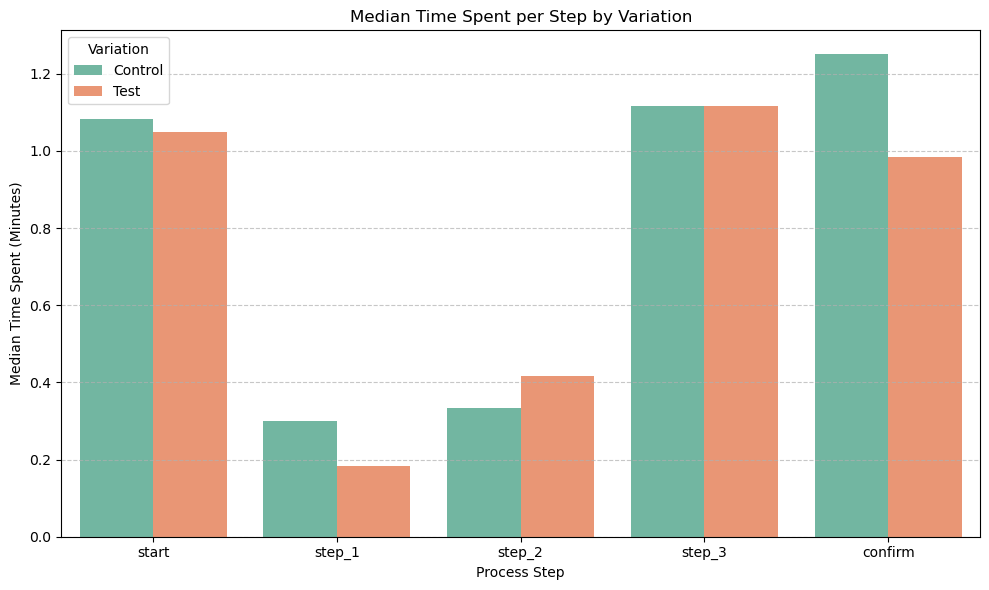

In [27]:
# Bar chart for median time spent per step
plt.figure(figsize=(10, 6))
sns.barplot(data=time_spent, x='process_step', y='time_diff_minutes', order=["start","step_1","step_2","step_3", "confirm"], hue='Variation', palette='Set2')

# Customize the chart
plt.title("Median Time Spent per Step by Variation")
plt.xlabel("Process Step")
plt.ylabel("Median Time Spent (Minutes)")
plt.legend(title="Variation")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

detection d'erreur sur les étapes 



In [ ]:

sample_users = df_all['client_id'].sample(5)
for user in sample_users:
    print(df_all[df_all['client_id'] == user][['visit_id', 'process_step', 'step_order']])



                           visit_id process_step  step_order
98214  937563787_28906008871_284250        start           1
98323  452400098_91589381081_693805        start           1
98322  452400098_91589381081_693805       step_1           2
98321  452400098_91589381081_693805       step_2           3
98320  452400098_91589381081_693805       step_3           4
98319  452400098_91589381081_693805      confirm           5
                            visit_id process_step  step_order
183635  632356080_74409044311_622388       step_3           4
183634  632356080_74409044311_622388      confirm           5
                          visit_id process_step  step_order
215440  9690122_82910244536_754539      confirm           5
                            visit_id process_step  step_order
226756  485153498_16933903643_852874        start           1
226755  485153498_16933903643_852874       step_1           2
226754  485153498_16933903643_852874       step_2           3
226753  485153498_1

In [ ]:

df_all['prev_step'] = df_all.groupby(['client_id', 'visit_id'])['process_step'].shift(1)
transitions = df_all.groupby(['prev_step', 'process_step']).size().reset_index(name='count')
print(transitions.sort_values(by='count', ascending=False))


   prev_step process_step  count
20    step_3      confirm  11396
19    step_2       step_3  10908
13    step_1       step_2   8925
7      start       step_1   8637
6      start        start   8522
0    confirm      confirm   3733
11    step_1        start   3145
23    step_3       step_2   2299
17    step_2       step_1   2126
21    step_3        start   1375
12    step_1       step_1   1224
24    step_3       step_3   1187
16    step_2        start    798
18    step_2       step_2    632
9      start       step_3    359
22    step_3       step_1    358
1    confirm        start    319
8      start       step_2    272
4    confirm       step_3    125
2    confirm       step_1     79
14    step_1       step_3     27
15    step_2      confirm     27
5      start      confirm     24
10    step_1      confirm      7
3    confirm       step_2      1


In [ ]:
valid_transitions = {
    'start': ['step_1'],
    'step_1': ['step_2'],
    'step_2': ['step_3'],
    'step_3': ['confirm']
}

df_all['prev_step'] = df_all.groupby(['client_id', 'visit_id'])['process_step'].shift(1)
df_all['is_error'] = ~df_all.apply(lambda row: row['process_step'] in valid_transitions.get(row['prev_step'], []), axis=1)

error_counts = df_all[df_all['is_error']].groupby(['process_step', 'Variation'])['client_id'].nunique()
total_users = df_all.groupby(['process_step', 'Variation'])['client_id'].nunique()
error_rate_percentage = (error_counts / total_users * 100).reset_index()
error_rate_percentage.columns = ['process_step', 'Variation', 'error_rate_percentage']

print(error_rate_percentage)



  process_step Variation  error_rate_percentage
0      confirm   Control              38.601360
1      confirm      Test              48.483930
2        start   Control             100.000000
3        start      Test             100.000000
4       step_1   Control              51.942446
5       step_1      Test              62.471483
6       step_2   Control              52.046784
7       step_2      Test              46.144279
8       step_3   Control              47.897846
9       step_3      Test              46.552839


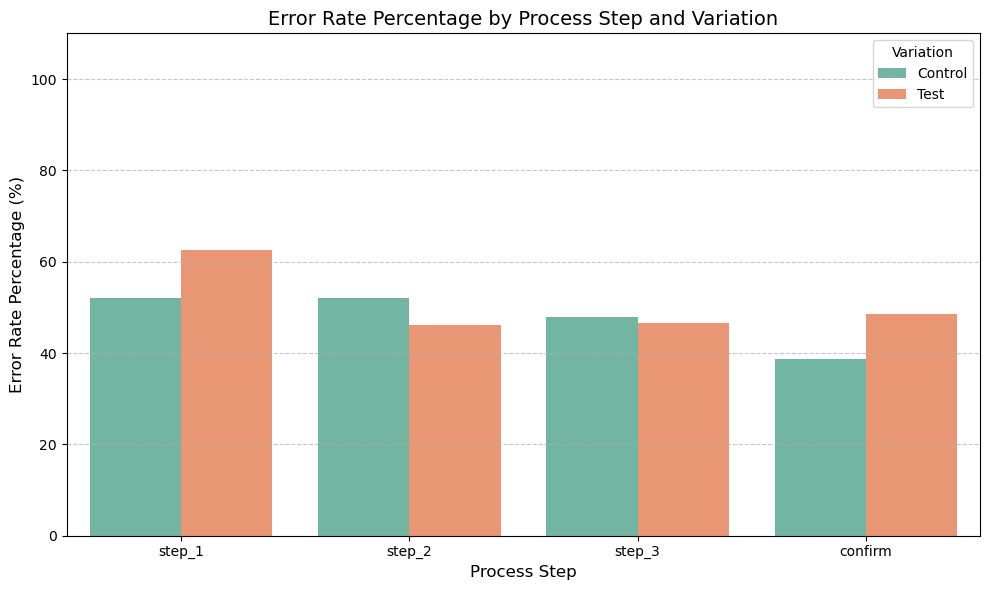

In [36]:
data = {
    "process_step": ["start", "start", "step_1", "step_1", "step_2", "step_2", "step_3", "step_3","confirm", "confirm"],
    "Variation": ["Control", "Test", "Control", "Test", "Control", "Test", "Control", "Test", "Control", "Test"],
    "error_rate_percentage": [100.000000, 100.000000, 51.942446, 62.471483, 52.046784, 46.144279, 47.897846, 46.552839, 38.601360, 48.483930],
}
df_all = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_all,
    x="process_step",
    y="error_rate_percentage",
    order=["step_1", "step_2", "step_3", "confirm" ],
    hue="Variation",
    palette="Set2",
)

# Chart Customizations
plt.title("Error Rate Percentage by Process Step and Variation", fontsize=14)
plt.xlabel("Process Step", fontsize=12)
plt.ylabel("Error Rate Percentage (%)", fontsize=12)
plt.ylim(0, 110)  # Set the y-axis limit for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Variation")

# Show Plot
plt.tight_layout()
plt.show()

#### User engagement 

Return rate of users over a given period (7 days, 30 days).

Connection frequency (logons_6_mnth) before and after the experience.

In [7]:
df_all['date'] = pd.to_datetime(df_all['date'], dayfirst=True)

df_all = df_all.sort_values(by=['client_id', 'date'])
first_visits = df_all.groupby('client_id')['date'].first().reset_index()
subsequent_visits = df_all.merge(first_visits, on='client_id', suffixes=('', '_first'))

subsequent_visits['days_since_first'] = (subsequent_visits['date'] - subsequent_visits['date_first']).dt.days

return_7_days = subsequent_visits[subsequent_visits['days_since_first'] <= 7]['client_id'].nunique() / first_visits['client_id'].nunique() * 100
return_30_days = subsequent_visits[subsequent_visits['days_since_first'] <= 30]['client_id'].nunique() / first_visits['client_id'].nunique() * 100

return_7_days, return_30_days


(100.0, 100.0)

In [ ]:
experiment_start_date = pd.to_datetime("01/05/2017", dayfirst=True)
df_all['period'] = df_all['date'].apply(lambda x: 'pre' if x < experiment_start_date else 'post')

logons_summary = df_all.groupby(['period', 'Variation'])['logons_6_mnth'].mean().reset_index()
logons_summary


,period,Variation,logons_6_mnth
0,post,Control,6.569649
1,post,Test,6.436651
2,pre,Control,6.205103
3,pre,Test,6.193435
